### GPN's KLU ACP2 Data - Step06_WHz_new

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

In [3]:
import radio as rio
from radio.data import get_first_batch

#### Setup Data

In [4]:
data = rio.data.KLUAPC2DataModule(
    root='/media/cerebro/Studies/KLU_APC2/Public/Analysis/data',
    use_augmentation=True,
    modalities=["T1w", "FLAIR"],
    labels=["WMH"],
)
data.prepare_data()
data.setup()
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 120 subjects.
Validation: 29 subjects.
Test: 37 subjects.


#### Get a Train and a Test Batch

In [5]:
train_dataloaders = data.train_dataloader()
val_dataloaders = data.val_dataloader()
test_dataloaders = data.test_dataloader()

In [6]:
# Takes a long time because it resamples
# the entire batch to the T1w images.
# It will slow down training. Preprocessing beforehand
# is therefore recommended.
train_batch = get_first_batch(train_dataloaders[0])

In [7]:
train_batch.keys()

dict_keys(['subj_id', 'scan_id', 'T1w', 'FLAIR', 'WMH'])

In [8]:
train_batch["WMH"]["data"].shape

torch.Size([32, 2, 256, 256, 256])

#### Plot Example Samples from Batches

image shape: torch.Size([256, 256, 256]), label shape: torch.Size([256, 256, 256])


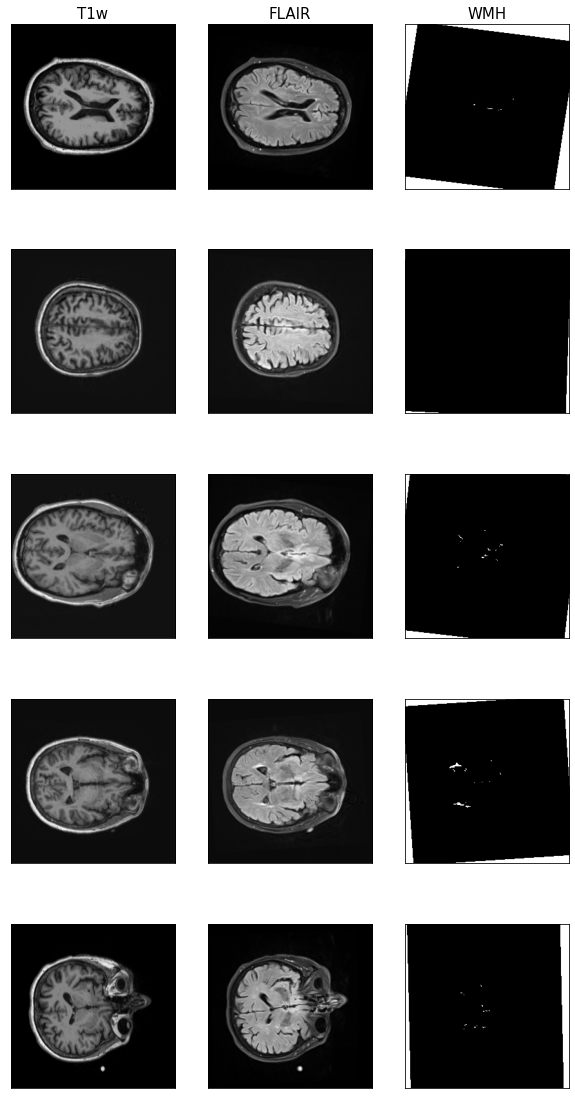

In [9]:
rio.data.plot_klu(train_batch, train=True)